Improvement:
* Use a much larger CNN
* Use data augmentation

## 1: Import Pytorch & Required Libs

In [ ]:
# Import PyTorch & required Libs
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## 2: Import Dataset: Train Dataset & Test Dataset

We use data augmentation in the train dataset to improve the model. Data augmentation is done by built-in data transformer of torchvision `trochvision.transforms.Compose`.
https://pytorch.org/vision/stable/transforms.html

In [ ]:
# Data Transformer
# https://pytorch.org/vision/stable/transforms.html

transformer_train = torchvision.transforms.Compose([
                   transforms.RandomCrop(32, padding=4),
                   torchvision.transforms.RandomHorizontalFlip(p=0.5),
                   # torchvision.transforms.RandomRotation(degree=15),
                   torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
                   # torchvision.transforms.RandomPerspective(),
                   transforms.ToTensor()                             
])

train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform = transformer_train,
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True 
)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
# Behave differently from MNIST/ Fashion MNIST
# It is a Numpy Array!

train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# we are working with color images now
train_dataset.data.shape

(50000, 32, 32, 3)

In [ ]:
# behaves differently from MNIST / Fashion MNIST
# It is a list!
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [ ]:
# number of classes
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


## 3: Data Loader: Train Loader & Test Loader

In [ ]:
# Data Loader
# Useful because it automatically generates batches in the training loop
# and take care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# Make one for testing
train_dataset_fixed = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

train_loader_fixed = torch.utils.data.DataLoader(
    dataset=train_dataset_fixed,
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified


In [ ]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.0000, 0.1804, 0.2510,  ..., 0.4863, 0.4784, 0.4706],
          [0.0000, 0.2078, 0.1922,  ..., 0.4824, 0.4784, 0.4706],
          [0.0000, 0.3137, 0.2039,  ..., 0.4863, 0.4863, 0.4745],
          ...,
          [0.0000, 0.3059, 0.3333,  ..., 0.3333, 0.3020, 0.2824],
          [0.0000, 0.2863, 0.2941,  ..., 0.3529, 0.2902, 0.2667],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.2235, 0.2941,  ..., 0.5647, 0.5608, 0.5490],
          [0.0000, 0.2353, 0.2157,  ..., 0.5608, 0.5569, 0.5451],
          [0.0000, 0.3294, 0.2314,  ..., 0.5608, 0.5569, 0.5451],
          ...,
          [0.0000, 0.3765, 0.3961,  ..., 0.3765, 0.3608, 0.3412],
          [0.0000, 0.3490, 0.3647,  ..., 0.3882, 0.3412, 0.3255],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.2196, 0.3137,  ..., 0.6549, 0.6510, 0.6392],
          [0.0000, 0.2118, 0.1922,  ..., 0.6471, 0.6392, 0.6275],
          [0.0000, 0.2824, 0.2078,  ..., 0

## 4: Create the Model

In [ ]:
# Define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()

    # define the Conv layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2)
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2)
    )

    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2)
    )

    # Useful link: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
    # H_out = H_in + 2p - 2 --> p = 1 if H_out = H_in

    # Easy to calculate output
    # 32 > 16 > 8 > 4

    # define the linear layers
    self.fc1 = nn.Linear(128 * 4 * 4, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [ ]:
# Instantiate the model
model = CNN(K)

### Move the model to CUDA/GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel

### Loss and Optimizer

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

## 5: Train the Model

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()

    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # print("inputs.shape:", inputs.shape)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get the train loss
    train_loss = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      outputs = model(inputs)
      loss =  criterion(outputs, targets)
      test_loss.append(loss.item())

    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \ Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=80)

Epoch 1/80, Train Loss: 1.4443, \ Test Loss: 1.1409, Duration: 0:00:45.291242
Epoch 2/80, Train Loss: 1.0340, \ Test Loss: 0.8969, Duration: 0:00:44.617414
Epoch 3/80, Train Loss: 0.8603, \ Test Loss: 0.7870, Duration: 0:00:44.659214
Epoch 4/80, Train Loss: 0.7559, \ Test Loss: 0.7476, Duration: 0:00:44.297195
Epoch 5/80, Train Loss: 0.6941, \ Test Loss: 0.6763, Duration: 0:00:44.556456
Epoch 6/80, Train Loss: 0.6429, \ Test Loss: 0.6399, Duration: 0:00:44.024541
Epoch 7/80, Train Loss: 0.6067, \ Test Loss: 0.6094, Duration: 0:00:44.614611
Epoch 8/80, Train Loss: 0.5750, \ Test Loss: 0.5769, Duration: 0:00:45.954772
Epoch 9/80, Train Loss: 0.5458, \ Test Loss: 0.5996, Duration: 0:00:44.849329
Epoch 10/80, Train Loss: 0.5298, \ Test Loss: 0.5867, Duration: 0:00:44.907896
Epoch 11/80, Train Loss: 0.5069, \ Test Loss: 0.5563, Duration: 0:00:45.070593
Epoch 12/80, Train Loss: 0.4923, \ Test Loss: 0.5352, Duration: 0:00:45.039938
Epoch 13/80, Train Loss: 0.4743, \ Test Loss: 0.5386, Duratio

## 6: Evaluate the Model

### Plot Train and Test Loss Per Iteration

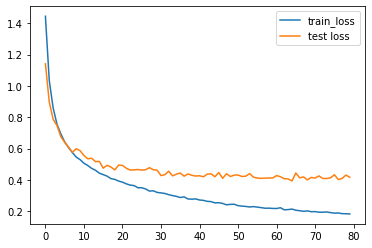

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

### Model Accuracy

In [ ]:
## Accuracy
# For Train Accuracy
n_correct = 0
n_total = 0
for inputs, targets in train_loader_fixed:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

# For Test Accuracy
n_correct = 0
n_total = 0
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9451, Test acc: 0.8772


### Confusion Matrix

In [ ]:
# Confusion matrix func
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

Confusion matrix, without normalization
[[889   9  29  11  10   1   0   5  32  14]
 [  4 948   1   3   0   2   2   0  10  30]
 [ 34   1 821  40  27  25  30  16   4   2]
 [ 15   2  25 771  34  81  31  30   4   7]
 [ 10   1  32  26 864  24  20  20   2   1]
 [  3   1  22 120  19 796  11  26   0   2]
 [  7   2  25  29   5  10 915   0   3   4]
 [  6   0   5  25  14  22   3 918   5   2]
 [ 38   9   5   5   2   1   3   1 928   8]
 [ 14  38   2   4   1   2   0   2  19 918]]


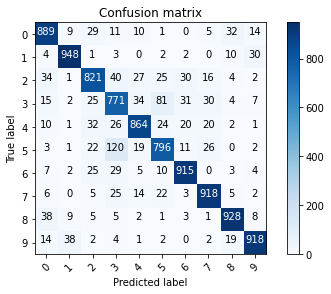

In [ ]:
# get all predictions in an array and plot confusion matrix
X_test = test_dataset.data
y_test = np.array(test_dataset.targets)
pred_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)

  # update pred_test
  pred_test = np.concatenate((pred_test, predictions.cpu().numpy()))

conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(K)))

## 7: Predictions: True-Classified vs Misclassified Examples

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

### True Classified Example

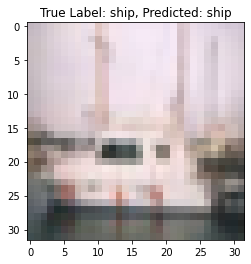

In [ ]:
# Show some true classified example
pred_test = pred_test.astype(np.uint8)
true_classified_idx = np.where(pred_test == y_test)[0]
i = np.random.choice(true_classified_idx)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));

### Misclassified Example

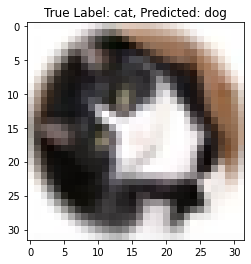

In [ ]:
# Show some misclassified example
pred_test = pred_test.astype(np.uint8)
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(32, 32, 3))
plt.title("True Label: %s, Predicted: %s" % (labels[y_test[i]], labels[pred_test[i]]));